In [18]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")

from utils.aws import read_json
from utils.metrics import windiff
from constants import *
from utils.eval import *

# Models
model_dict = {
    "gpt-4o-few-shot": "gpt-4o-v1",
    "gpt-4o-base": "gpt-4o-v0",
    "transformer": "transformer_v2"
}

## View Transformer Model Loss Curve

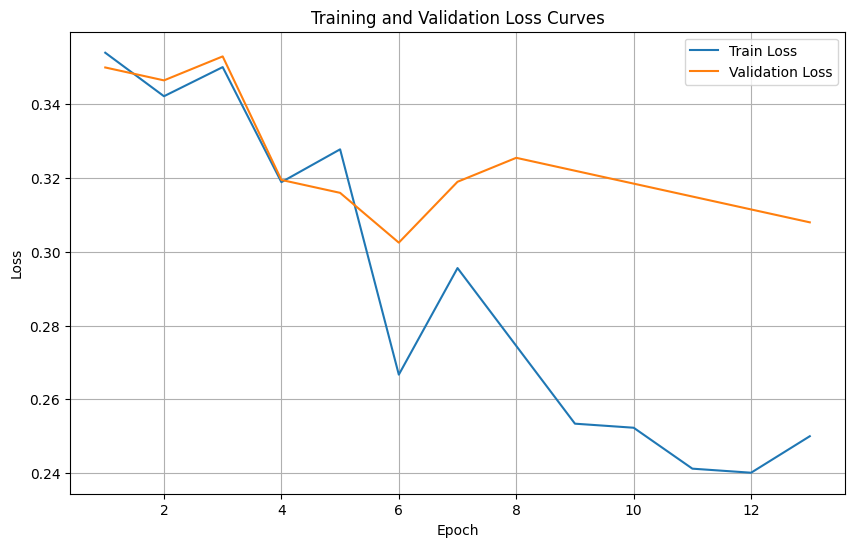

In [34]:
loss_vals = read_json(S3_BUCKET_NAME, "models/transformer_v2/loss_vals.json")
train_loss = loss_vals['train_loss']
val_loss = loss_vals['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

## Compare Validation Metrics

gpt-4o-few-shot Mean WinDiff: 0.08464
gpt-4o-few-shot Mean Topic Diff: 2.454
gpt-4o-base Mean WinDiff: 0.30464
gpt-4o-base Mean Topic Diff: 2.321
transformer Mean WinDiff: 0.18464
transformer Mean Topic Diff: -7.321


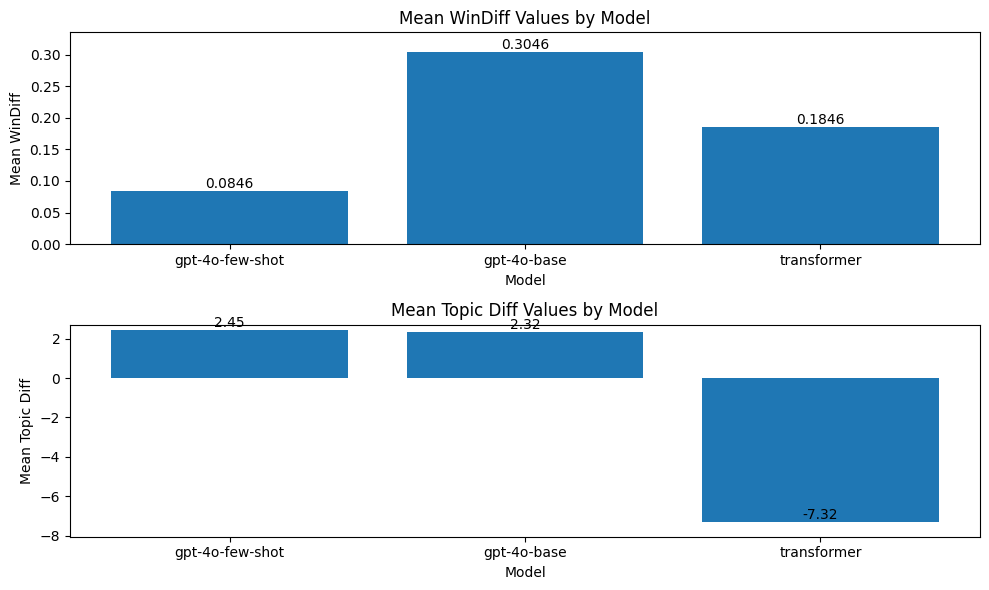

In [36]:
# Create lists to store model names, mean WinDiff values, and mean Topic Diff values
model_names = []
mean_windiff_values = []
mean_topic_diff_values = []

for model_name, config_name in model_dict.items():
    # Load the results from S3
    s3_file_key = f"{S3_MODELS_DIR}/{config_name}/val_results.json"
    results = read_json(S3_BUCKET_NAME, s3_file_key)
    
    # Append model name, mean WinDiff value, and mean Topic Diff value to lists
    model_names.append(model_name)
    mean_windiff_values.append(results['overall']['mean_windiff'])
    mean_topic_diff_values.append(results['overall']['mean_topic_diff'])
    
    print(f"{model_name} Mean WinDiff: {results['overall']['mean_windiff']}")
    print(f"{model_name} Mean Topic Diff: {results['overall']['mean_topic_diff']}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot Mean WinDiff Values
plot_mean_windiff(model_names, mean_windiff_values, ax1)

# Plot Mean Topic Diff Values
plot_mean_topic_diff(model_names, mean_topic_diff_values, ax2)

plt.tight_layout()
plt.show()

## Evaluate a Single Video

gpt-4o-few-shot Window diff: 0.14595660749506903
gpt-4o-base Window diff: 0.23471400394477318
transformer Window diff: 0.1834319526627219


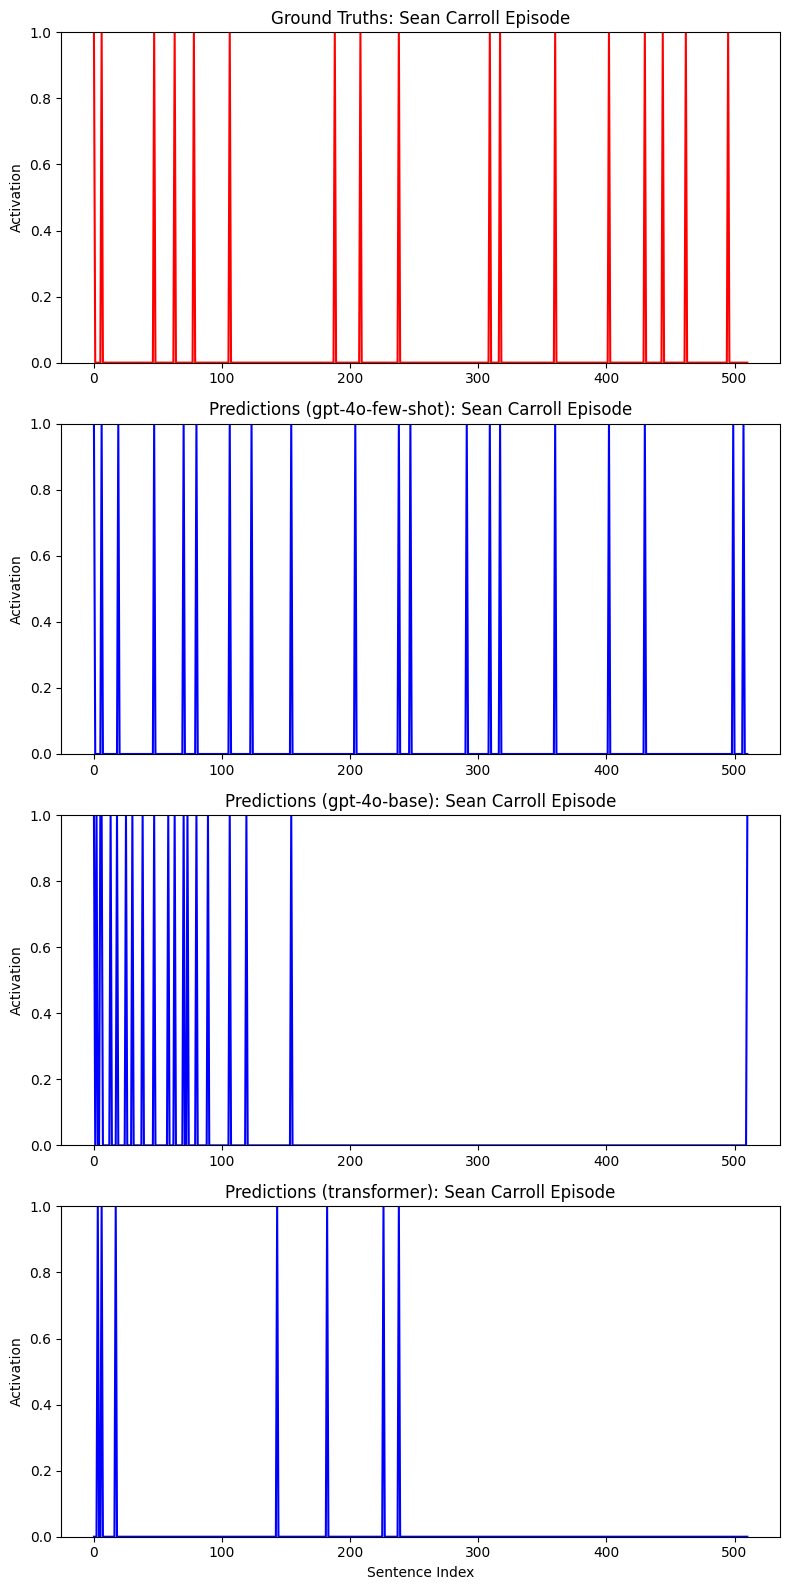

In [37]:
# Input the video id
video_id = "tdv7r2JSokI"

pred_dict = {}
for model_name, config_name in model_dict.items():
    # Load the results from S3
    s3_file_key = f"{S3_MODELS_DIR}/{config_name}/eval/{video_id}_results.json"
    results = read_json(S3_BUCKET_NAME, s3_file_key)

    # Plot the predictions vs ground truths
    predictions = np.array(results['predictions'])
    ground_truths = np.array(results['ground_truths'])
    title = results['title']

    # Calculate window diff
    window_diff = windiff(predictions, ground_truths, window_size=5)
    print(f"{model_name} Window diff: {window_diff}")

    # Pack into dict
    pred_dict[model_name] = {"predictions": predictions, "ground_truths": ground_truths, "raw_predictions": results['raw_predictions']}


plot_predictions_vs_ground_truths(pred_dict, ground_truths, title.split(":")[0] + " Episode")

In [21]:
# Topics from gpt-4o-few-shot
pred_dict['gpt-4o-few-shot']['raw_predictions']

{'0': 'Introduction',
 '120': 'General relativity',
 '365': "Einstein's miracle year",
 '864': 'Black holes',
 '1278': 'Hawking radiation',
 '1434': 'Alien civilizations',
 '1939': 'Holographic principle',
 '2251': 'Information loss puzzle',
 '2798': 'Testing speculative ideas',
 '3694': 'Dark matter and dark energy',
 '4287': 'Quantum mechanics',
 '4446': 'Many worlds interpretation',
 '5239': 'Big bang',
 '5571': 'Simulation hypothesis',
 '5733': 'Artificial general intelligence (AGI)',
 '6575': 'Santa Fe Institute and complexity',
 '7342': 'Panpsychism',
 '7895': 'Poetic naturalism',
 '9099': 'Einstein and the Nobel Prize',
 '9245': 'Conclusion and thanks'}